In [1]:
import pandas as pd
import numpy as np
import scipy.sparse as sp
import scipy.linalg as la
import matplotlib
matplotlib.use("svg")
# AUTOLAB_IGNORE_START
%matplotlib inline
# AUTOLAB_IGNORE_STOP
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [53]:
data = pd.read_csv("../data/fce.csv")
print(data.shape)
fdata = data[(data['Possible Respondents']>40) & (data['Response Rate %']>=40)]
ffdata = fdata#.drop(['Possible Respondents', 'Num Respondents', 'Response Rate %', 'Hrs Per Week 5', 'Hrs Per Week 8'], axis = 1, inplace=False)
print(ffdata.shape)
print(data.Dept.unique())

(44136, 23)
(4858, 23)
['ARC' 'ART' 'CFA' 'CHE' 'CIT' 'CMU' 'CMY' 'CRM' 'CS' 'DES' 'DRA' 'ECE'
 'ENG' 'EPP' 'ETC' 'HC' 'HCI' 'HIS' 'IA' 'ICT' 'III' 'INI' 'IPS' 'ISH'
 'ISM' 'ISR' 'MCS' 'MEG' 'ML' 'MSC' 'MSE' 'MUS' 'PHI' 'PHY' 'PPP' 'SE'
 'STA' 'BA' 'BMD' 'BSC' 'BXA' 'CB' 'CEE' 'CNB' 'ECO' 'H00' 'HSS' 'LTI'
 'MLG' 'PMP' 'PROJECT' 'PSY' 'ROB' 'SDS' 'CAS' 'SV' 'TA' 'IS' 'PPM' 'WC']


In [8]:
ffdata.head()

,Year,Semester,Dept,Num,Section,Name,Course Name,Level,Possible Respondents,Num Respondents,...,Hrs Per Week 8,Interest in student learning,Clearly explain course requirements,Clear learning objectives & goals,Instructor provides feedback to students to improve,Demonstrate importance of subject matter,Explains subject matter of course,Show respect for all students,Overall teaching rate,Overall course rate
29,2018,Spring,CMY,09101,13,"SILVA, GLORIA",INTRO EXPERMNTL CHEM,Undergraduate,67,29,...,NaN,4.06,3.63,3.69,3.69,3.75,3.75,4.06,3.88,3.31
30,2018,Spring,CMY,09101,13,"VUOCOLO, LEONARD",INTRO EXPERMNTL CHEM,Undergraduate,67,29,...,NaN,4.03,4.14,3.83,3.76,3.76,3.97,4.21,3.86,3.31
93,2018,Spring,HC,94842,A3,"CHOULDECHOVA, OLEXANDRA",PROGRMG R ANALYTICS,Graduate,42,27,...,NaN,4.56,4.56,4.37,4.07,4.37,4.52,4.63,4.41,4.41
105,2018,Spring,IA,46902,M3,"OSTLUND, JOHN",FINANCIAL COMP II,Graduate,50,33,...,NaN,4.82,4.91,4.88,4.79,4.67,4.79,5.00,4.88,4.66
106,2018,Spring,IA,46902,I3,"OSTLUND, JOHN",FINANCIAL COMP II,Graduate,45,25,...,NaN,4.21,4.44,4.28,4.40,4.00,4.40,4.60,4.36,4.04


In [587]:
# cs_data= ffdata[(ffdata['Dept'] == 'CS')].drop(['Dept','Level'], axis = 1, inplace = False)
# cs_data.dropna(subset=['Hrs Per Week', 'Name','Overall course rate'], inplace = True)
# cs_courses_category = cs_data.Num.unique()
# cs_teachers_category = cs_data.Name.unique()
# cs_year_category = cs_data.Year.unique()
# print(cs_data.dtypes)
# print(cs_courses_category.shape)
# print(cs_teachers_category.shape)
# print(cs_year_category.shape)
# cs_course_rate= cs_data['Overall course rate']
# cs_min = cs_course_rate.min()
# print(cs_min)
# cs_hrperwk = cs_data['Hrs Per Week']
# cs_teacher = cs_data['Name']
# cs_teach_rate = cs_data['Overall teaching rate']
# cs_year = cs_data['Year']


In [321]:
# N = cs_data.shape[0]
# print(N)
# x = cs_year
# y = cs_hrperwk
# z = cs_teach_rate
# c = cs_course_rate
# print(x.shape, y.shape, z.shape, cs_data.shape)

In [322]:
# plt.scatter(x, y, c=c, alpha=0.5)
# plt.clim(cs_min,5)
# plt.colorbar()
# plt.show()

In [323]:
# com_data= ffdata[(ffdata['Dept'] == 'CS') | (ffdata['Dept'] == 'ECE')].drop(['Dept','Level'], axis = 1, inplace = False)
# com_data.dropna(subset=['Hrs Per Week'], inplace = True)
# com_courses_category = com_data.Num.unique()
# com_teachers_category = com_data.Name.unique()
# com_year_category = com_data.Year.unique()
# print(com_courses_category.shape)
# print(com_teachers_category.shape)
# print(com_year_category.shape)
# com_course_rate= com_data['Overall course rate']
# com_min = com_course_rate.min()
# print(com_min)
# com_hrperwk = com_data['Hrs Per Week']
# com_teacher = com_data['Name']
# com_teach_rate = com_data['Overall teaching rate']
# com_year = com_data['Year']

In [324]:
# N = com_data.shape[0]
# print(N)
# x = com_year
# y = com_hrperwk
# z = com_teach_rate
# c = com_course_rate
# print(x.shape, y.shape, z.shape, com_data.shape)

In [310]:
# plt.scatter(x, y, c=c, alpha=0.5)
# plt.clim(com_min,5)
# plt.colorbar()
# plt.show()

In [311]:
# x = com_year
# y1 = com_hrperwk
# y2 = com_teach_rate
# c = com_course_rate

# fig, ax1 = plt.subplots()

# ax2 = ax1.twinx()
# ax1.scatter(x, y1, c=c, alpha=0.5)
# ax2.scatter(x, y2, c=c, alpha=0.5)

# ax1.set_xlabel('Year')
# ax1.set_ylabel('Hrs per Week')
# ax2.set_ylabel('Teaching Rate')

# plt.show()

In [54]:
all_data= ffdata.drop(['Level'], axis = 1, inplace = False)
print(all_data.shape)
all_data.dropna(subset=['Hrs Per Week'], inplace = True)
print(all_data.shape)

all_courses_category = all_data.Num.unique()
all_teachers_category = all_data.Name.unique()
all_year_category = all_data.Year.unique()
all_course_rate= all_data['Overall course rate']
all_min = all_course_rate.min()
print(all_min)
all_resrate = all_data['Response Rate %']
print(all_resrate.shape)
all_courses = all_data['Num']
print(all_courses.shape)
all_hrperwk = all_data['Hrs Per Week']
all_teacher = all_data['Name']
all_teach_rate = all_data['Overall teaching rate']
all_year = all_data['Year']
all_dept = all_data['Dept']
all_1 = all_data['Interest in student learning']
all_2 = all_data['Clearly explain course requirements']
all_3 = all_data['Clear learning objectives & goals']
all_4 = all_data['Instructor provides feedback to students to improve']
all_5 = all_data['Demonstrate importance of subject matter']
all_6 = all_data['Explains subject matter of course']
all_7 = all_data['Show respect for all students']

(4858, 22)
(2353, 22)
1.42
(2353,)
(2353,)


In [55]:
N = all_data.shape[0]
print(N)
c = all_course_rate

2353


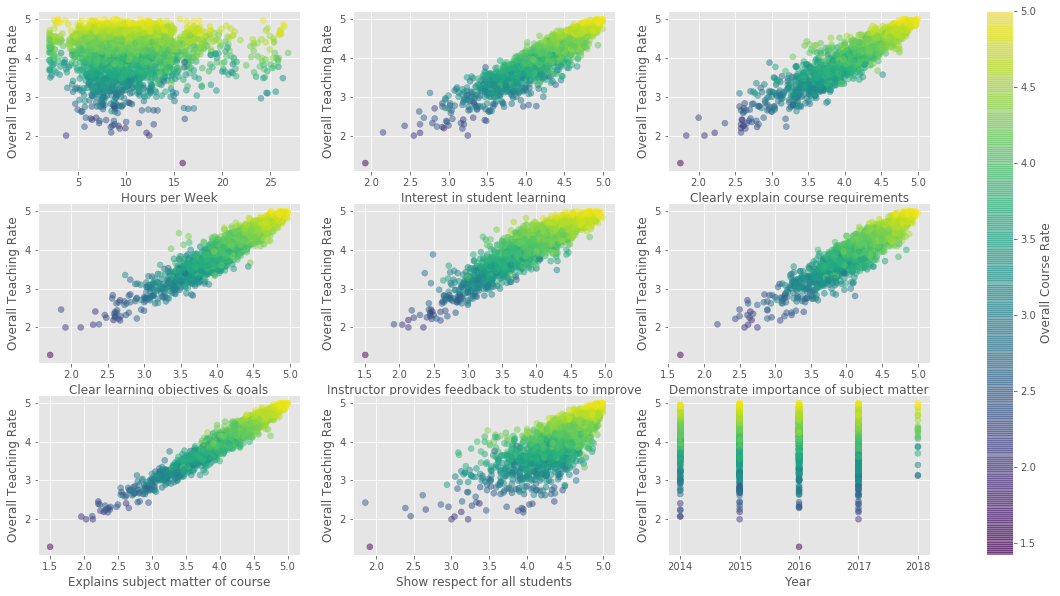

In [99]:
fig, axes = plt.subplots(3, 3, figsize=(20,10))
plt0 = axes[0,0].scatter(all_hrperwk, all_teach_rate, c=c, alpha = 0.5)
axes[0,0].set_xlabel('Hours per Week')
axes[0,0].set_ylabel('Overall Teaching Rate')

plt0 = axes[0,1].scatter(all_1, all_teach_rate, c=c, alpha = 0.5)
axes[0,1].set_xlabel('Interest in student learning')
axes[0,1].set_ylabel('Overall Teaching Rate')
# plt.colorbar(plt1,ax=axes[0,1])

plt0 = axes[0,2].scatter(all_2, all_teach_rate, c=c, alpha = 0.5)
axes[0,2].set_xlabel('Clearly explain course requirements')
axes[0,2].set_ylabel('Overall Teaching Rate')
# plt.colorbar(plt2,ax=axes[0,2])

plt0 = axes[1,0].scatter(all_3, all_teach_rate, c=c, alpha = 0.5)
axes[1,0].set_xlabel('Clear learning objectives & goals')
axes[1,0].set_ylabel('Overall Teaching Rate')
# plt.colorbar(plt3,ax=axes[0,3])


plt0 = axes[1,1].scatter(all_4, all_teach_rate, c=c, alpha = 0.5)
axes[1,1].set_xlabel('Instructor provides feedback to students to improve')
axes[1,1].set_ylabel('Overall Teaching Rate')
# plt.colorbar(plt4,ax=axes[1,0])

plt0 = axes[1,2].scatter(all_5, all_teach_rate, c=c, alpha = 0.5)
axes[1,2].set_xlabel('Demonstrate importance of subject matter')
axes[1,2].set_ylabel('Overall Teaching Rate')
# plt.colorbar(plt5,ax=axes[1,0])


plt0 = axes[2,0].scatter(all_6, all_teach_rate, c=c, alpha = 0.5)
axes[2,0].set_xlabel('Explains subject matter of course')
axes[2,0].set_ylabel('Overall Teaching Rate')

plt0 = axes[2,1].scatter(all_7, all_teach_rate, c=c, alpha = 0.5)
axes[2,1].set_xlabel('Show respect for all students')
axes[2,1].set_ylabel('Overall Teaching Rate')

axes[2,2].scatter(all_year, all_teach_rate, c=c, alpha = 0.5)
axes[2,2].set_xlabel('Year')
axes[2,2].set_ylabel('Overall Teaching Rate')

cb = plt.colorbar(plt0,ax=axes)
cb.set_label('Overall Course Rate')



# axes[2,1].scatter(all_dept, all_teacher, c=c, alpha = 0.5)
# axes[2,2].scatter(all_teacher, all_courses, c=c, alpha = 0.5)
plt.show()

For FCE, 8 categories.
Hours per Week:                                        the final course rate / teaching rate doens't matter whether 
                                                       hours per week is high or low
Interest in student learning                           the final course rate / teaching rate increases when this score 
                                                       increases
Clearly explain course requirements                    
Clear learning objectives & goals                      
Instructor provides feedback to students to improve    
Demonstrate importance of subject matter               
Explains subject matter of course                      
Show respect for all students                          

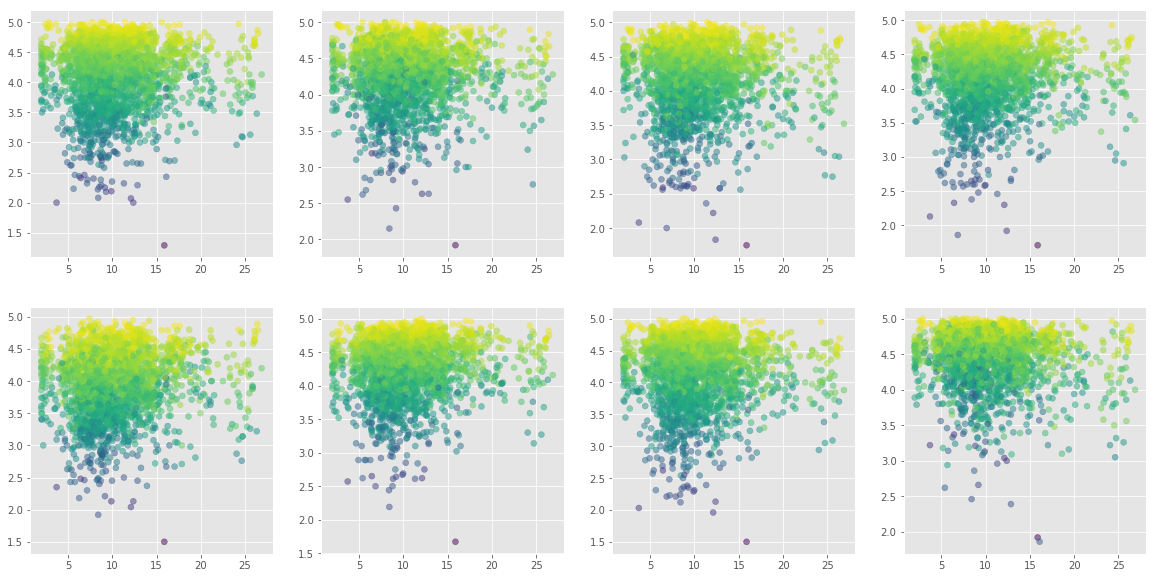

In [601]:
fig, axes = plt.subplots(2, 4, figsize=(20,10))
axes[0,0].scatter(all_hrperwk, all_teach_rate, c=c, alpha = 0.5)
axes[0,1].scatter(all_hrperwk, all_1, c=c, alpha = 0.5)
axes[0,2].scatter(all_hrperwk, all_2, c=c, alpha = 0.5)
axes[0,3].scatter(all_hrperwk, all_3, c=c, alpha = 0.5)
axes[1,0].scatter(all_hrperwk, all_4, c=c, alpha = 0.5)
axes[1,1].scatter(all_hrperwk, all_5, c=c, alpha = 0.5)
axes[1,2].scatter(all_hrperwk, all_6, c=c, alpha = 0.5)
axes[1,3].scatter(all_hrperwk, all_7, c=c, alpha = 0.5)
# axes[2,0].scatter(all_year, all_teach_rate, c=c, alpha = 0.5)
# axes[2,1].scatter(all_dept, all_teacher, c=c, alpha = 0.5)
# axes[3,1].scatter(all_teacher, all_courses, c=c, alpha = 0.5)
# fig.colorbar(im, cax=[all_min,5])
plt.show()

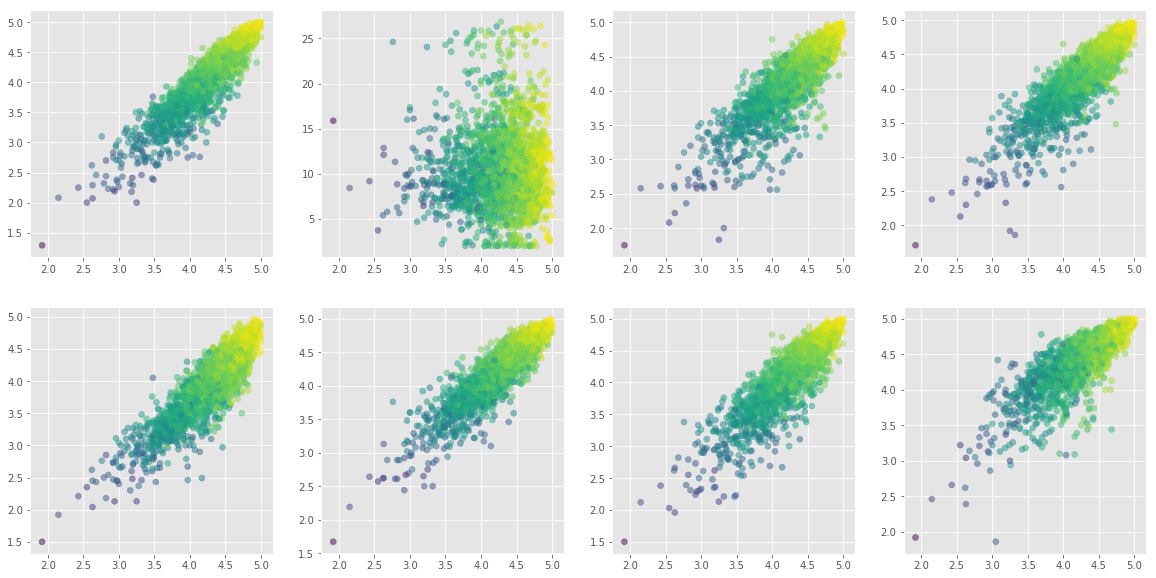

In [602]:
fig, axes = plt.subplots(2, 4, figsize=(20,10))
axes[0,0].scatter(all_1, all_teach_rate, c=c, alpha = 0.5)
axes[0,1].scatter(all_1, all_hrperwk, c=c, alpha = 0.5)
axes[0,2].scatter(all_1, all_2, c=c, alpha = 0.5)
axes[0,3].scatter(all_1, all_3, c=c, alpha = 0.5)
axes[1,0].scatter(all_1, all_4, c=c, alpha = 0.5)
axes[1,1].scatter(all_1, all_5, c=c, alpha = 0.5)
axes[1,2].scatter(all_1, all_6, c=c, alpha = 0.5)
axes[1,3].scatter(all_1, all_7, c=c, alpha = 0.5)
# axes[2,0].scatter(all_year, all_teach_rate, c=c, alpha = 0.5)
# axes[2,1].scatter(all_dept, all_teacher, c=c, alpha = 0.5)
# axes[3,1].scatter(all_teacher, all_courses, c=c, alpha = 0.5)
# fig.colorbar(im, cax=[all_min,5])
plt.show()

In [329]:
# print(all_courses_category)

In [328]:
print(all_data[all_data['Num']=='15121'])

       Year Semester Dept    Num Section                Name  \
816    2017     Fall   CS  15121       1       STEHLIK, MARK   
18203  2014     Fall   CS  15121       1  CARRASQUEL, JACOBO   

                Course Name  Possible Respondents  Num Respondents  \
816    INTRO DATA STRUCTURS                    41               27   
18203  INTRO DATA STRUCTURS                    44               27   

       Response Rate %         ...           Hrs Per Week 8  \
816              65.85         ...                      NaN   
18203            61.36         ...                      NaN   

       Interest in student learning  Clearly explain course requirements  \
816                            4.48                                 4.54   
18203                          2.96                                 3.48   

       Clear learning objectives & goals  \
816                                 4.63   
18203                               3.41   

       Instructor provides feedback to stude

In [18]:
features = pd.read_csv("../data/features.csv")
print(features.shape)
dept = features['0_dept'].unique()
print(dept)
print(features.shape)
# print(features[features.isnull().any(axis=1)])
features.dropna(how='any', axis = 0, inplace = True)
print(features.shape)
data_set = np.concatenate((features.iloc[:,:19].values, features.iloc[:,19:38].values), axis=0)
# label_set = np.concatenate((features.iloc[:,22].values, features.iloc[:,41].values), axis=0)
label_set = np.concatenate((features.iloc[:,33].values, features.iloc[:,52].values), axis=0)
delta1 = features.iloc[:,33].values-features.iloc[:,14].values
print( features.iloc[:,33].values[:10])
print(features.iloc[:,14].values[:10])
delta2 = features.iloc[:,52].values-features.iloc[:,33].values
delta_label = np.concatenate((delta1, delta2), axis=0)
print(data_set.shape, label_set.shape)
print(label_set)

(3662, 58)
['CB' 'BSC' 'ICT' 'HCI' 'CHE' 'ISR' 'CMY' 'MLG' 'LTI' 'CEE' 'INI' 'CS'
 'ROB' 'SE' 'ECE' 'EPP' 'MSC' 'MEG' 'MSE' 'PHY' 'STA' 'MCS' 'CIT' 'BMD'
 'ARC' 'III' 'DES' 'BXA' 'ETC' 'DRA' 'MUS' 'ART' 'CFA' 'H00' 'HSS' 'ISH'
 'BA' 'ECO' 'ENG' 'HIS' 'PHI' 'ML' 'IPS' 'PSY' 'CNB' 'SDS' 'PPP' 'PROJECT'
 'PMP' 'CRM' 'HC' 'ISM' 'CMU']
(3662, 58)
(3614, 58)
[ 5  4 35  4  5  4 23  7 42  6]
[ 4  4 37  4  7  5  7 26  6 28]
(7228, 19) (7228,)
[ 5  4 35 ...,  7  3  5]


In [16]:
ava_data = data_set[:,[1,3,4,6,7,10,11,13,14,15,16,17]]
print(ava_data.shape)
P = np.random.permutation(len(label_set))
split = 5000
tr_idx, te_idx = P[:split], P[split:]
Xtrain, Xtest = ava_data[tr_idx], ava_data[te_idx]
# ytrain, ytest = label_set[tr_idx], label_set[te_idx]
ytrain, ytest = delta_label[tr_idx], delta_label[te_idx]
print(delta_label[:20])

(7228, 12)
[  1   0  -2   0  -2  -1  16 -19  36 -22   6  -1  -1   6   2  -3  40  11
  -3  -9]


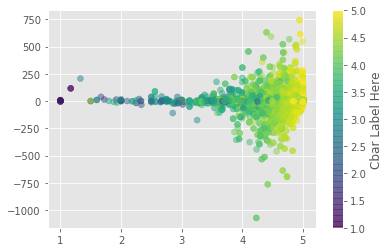

In [76]:
pl = plt.scatter(data_set[:,11], delta_label, c=data_set[:,1], alpha = 0.5)
cb = plt.colorbar()
cb.set_label('Cbar Label Here')


In [563]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True, normalize=False)
model.fit(Xtrain, deltaytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [572]:
y_pred = model.predict(Xtest)
ry_pred = (y_pred//10)*10#np.ceil(y_pred/10)*10
rytest = (ytest//10)*10#np.ceil(ytest/10)*10
print(ry_pred)
print(rytest)
# ry_pred[ry_pred==-0]=0
# rytest[rytest==-0]=0
# print(ry_pred)
# print(rytest)
result = (ry_pred == rytest).astype(int)
print(result.sum()/len(y_pred))

[  0. -10. -10. ..., -10. -10.   0.]
[-10 -10   0 ..., -20   0   0]
0.293087971275


In [573]:
dytrain, dytest = (ytrain//10*10+10), (ytest//10*10+10)

In [578]:
from sklearn.svm import LinearSVC, SVC
clf = SVC(C=1e4, kernel='linear') # or
clf = LinearSVC(C=1e4, loss='hinge', max_iter=1e5)
clf.fit(Xtrain, dytrain)

LinearSVC(C=10000.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=100000.0,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [583]:
dy_pred = clf.predict(Xtest)
print(dy_pred)
print(dytest)

[-310 -450 -280 ...,  210  210 -280]
[  0   0  10 ..., -10  10  10]


In [581]:
print((dy_pred==dytest).astype(int).sum()/len(dy_pred))

0.000897666068223


In [574]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C=10000.0)
clf.fit(Xtrain, dytrain)

LogisticRegression(C=10000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [576]:
dy_pred = clf.predict(Xtest)
print(dy_pred)
print(dytest)
print((dy_pred==dytest).astype(int).sum()/len(dy_pred))


[ 10  10  10 ...,   0 -10  10]
[  0   0  10 ..., -10  10  10]
0.32091561939


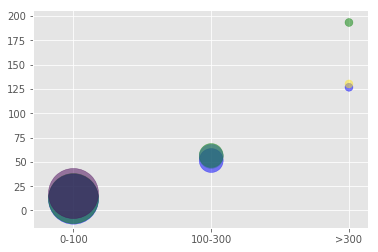

In [43]:
datasize = np.array([2514, 573, 63])
coursesize = np.array(['0-100', '100-300', '>300'])
lr = np.array([11.69, 51.35, 126.69])
dtr = np.array([12.28, 56.53, 193.28])
bdt = np.array([17.46, 55.56, 130.13])
clr = np.array(['blue','blue','blue'])
cdtr = np.array(['green', 'green', 'green'])
cbdt = np.array(['yellow','yellow','yellow'])
plt.scatter(coursesize, lr, s = datasize, c=clr, alpha = 0.5)
plt.scatter(coursesize, dtr, s = datasize, c=cdtr, alpha = 0.5)
plt.scatter(coursesize, bdt, s = datasize, c=bdt, alpha = 0.5)


plt.legend()

plt.show()

In [49]:
df = pd.read_csv("../data/features_5_years.csv")
print(df.shape)
print(df.dtypes)
print(df.head()[['0_year', '1_year']])
df.dropna(subset=['Hrs Per Week'], inplace = True)
print(df.shape)


(3634, 82)
0_dept                    object
0_num                      int64
0_semester                object
0_semester_int             int64
0_students                 int64
0_year                     int64
1_answers                  int64
1_clear_goals            float64
1_course_name             object
1_course_rate            float64
1_course_requirements    float64
1_dept                    object
1_feedback               float64
1_hrs_week               float64
1_level                   object
1_num                      int64
1_prof_interest          float64
1_respect                float64
1_semester                object
1_semester_int             int64
1_students                 int64
1_subject_importance     float64
1_subject_matter         float64
1_teaching_rate          float64
1_year                     int64
2_answers                  int64
2_clear_goals            float64
2_course_name             object
2_course_rate            float64
2_course_requirements    float64

KeyError: ['Hrs Per Week']